# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as sts
%matplotlib inline
from itertools import product,combinations
import warnings
warnings.filterwarnings('ignore')

In [53]:
import random

# определяем список возможных исходов
outcomes = ['орел-орел', 'орел-решка', 'решка-орел', 'решка-решка']

# генерируем случайный исход из списка 
outcome = random.choice(outcomes)

# выводим результат
if outcome == 'орел-решка' or outcome == 'решка-орел':
    print('Монеты выпали разными сторонами')
else:
    print('Монеты выпали одной стороной')

Монеты выпали разными сторонами


In [68]:
#определяем возможные исходы по каждой  монете
M1 = ['Орел', 'Решка']
M2 = ['Орел', 'Решка']

# задаем число экспериментов
n = 100000
x = 0

for i in range(n):
    if random.choice(M1) != random.choice(M2):
    x += 1
#P = x/n
print('Вероятность того, что монеты выпали разными сторонами =', x/n)
#print(f'Вероятность того, что монеты выпали разными сторонами {P}')

Вероятность того, что монеты выпали разными сторонами = 0.50054


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [70]:
#определяем количество испытаний
n = 100000
A = 0
B = 0
C = 0

M1 = [random.choice(range(0,2)) for i in range(n)]
M2 = [random.choice(range(0,2)) for i in range(n)] 
M3 = [random.choice(range(0,2)) for i in range(n)] 

#определем вероятность
for i in range(n):
    if M1[i]== 1 and M2[i]==1 and M3[i]==1: #не выпало ни одного герба
        A += 1 
    if (M1[i]==1 and M2[i]==0 and M3[i]==0) or (M1[i]==0 and M2[i]==1 and M3[i]==0) or (M1[i]==0 and M2[i]== 0 and M3[i]==1): #выпало четное число гербов
        B += 1
    if M3[i] == 0: #на третьей монете выпал герб
        C += 1 
        
uniq_events = np.unique ([M1, M2, M3], axis=1)

print('Mножество всех элементарных событий: \n', uniq_events[0],'\n', uniq_events[1], '\n', uniq_events[2])
print('Вероятность события A =', A/n)
print('Вероятность события B =', B/n)
print('Вероятность события C =', C/n)





Mножество всех элементарных событий: 
 [0 0 0 0 1 1 1 1] 
 [0 0 1 1 0 0 1 1] 
 [0 1 0 1 0 1 0 1]
Вероятность события A = 0.12439
Вероятность события B = 0.37515
Вероятность события C = 0.50183


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [27]:
# составляем все возможные комбинации решений каждого члена комиссии
all_solutions = list(product(['рекомендован', 'не рекомендован'], repeat=3))

# находим количество комбинаций, в которых L признан достойным хотя бы двумя членами комиссии
count_L = 0
for solution in all_solutions:
    if solution.count('рекомендован') >= 2 and solution.count('не рекомендован') == 1 and solution[0] != 'approve':
        count_L += 1

# находим количество комбинаций, в которых E признан достойным хотя бы двумя членами комиссии
count_E = 0
for solution in all_solutions:
    if solution.count('рекомендован') >= 2 and solution.count('не рекомендован') == 1 and solution[0] != 'approve':
        count_E += 1

# находим вероятность событий
P_A = count_L / len(all_solutions)
P_B = count_E / len(all_solutions)

print("Вероятность события A (рекомендован L):", P_A)
print("Вероятность события B (рекомендован E):", P_B)


Вероятность события A (рекомендован L): 0.375
Вероятность события B (рекомендован E): 0.375


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [65]:
#определяем количество испытаний
n = 100000
A = 0
B = 0
C = 0
k1 = [random.choice(range(1,7)) for i in range(n)] 
k2 = [random.choice(range(1,7)) for i in range(n)] 
#определяем вероятность событий 
for i in range(n):
    if k1[i] == 6 and k2[i] == 6:
        A+=1
    if k1[i] + k2[i] >= 11:
        B+=1
    if k1[i]!=6 and k2[i]!=6:
        C+=1
        
uniq_events = np.unique([k1, k2], axis=1)
      
print('Mножество элементарных событий:  \n', uniq_events[0], '\n' , uniq_events[1])  
print('Вероятность события A =', A/n)
print('Вероятность события B =', B/n)
print('Вероятность события C =', C/n)



Mножество элементарных событий:  
 [1 1 1 1 1 1 2 2 2 2 2 2 3 3 3 3 3 3 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 6] 
 [1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6 1 2 3 4 5 6]
Вероятность события A = 0.02811
Вероятность события B = 0.08328
Вероятность события C = 0.69663


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [71]:
#определяем количество испытаний
n = 100000
D = 0
#определяем какое число выпадет на 1 и 2 игральной кости
n1 = [random.choice(range(1,7)) for i in range(n)] 
n2 = [random.choice(range(1,7)) for i in range(n)] 
#вычисляем вероятность, что выпала хотя бы одна шестёрка
for i in range(n):
    if n1[i]==6 or n2[i] ==6 or (n1[i]==6 and n2[i] == 6):
        D+=1
print('вероятность события D =', D/n)

вероятность события D = 0.30639


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [72]:
#определяем количество испытаний
n = 100000
A=0
B=0
C=0
D=0
#определяем три цифры 
n1 = [random.choice(range(0,10)) for i in range(n)] 
n2 = [random.choice(range(0,10)) for i in range(n)] 
n3 = [random.choice(range(0,10)) for i in range(n)] 
#вычисляем вероятность событий
for i in range(n):
    if n1[i]!=n2[i] and n2[i]!=n3[i] and n3[i]!=n1[i]:
        A+=1
    if n1[i]==n2[i] and n2[i]==n3[i] and n3[i]==n1[i]:
        B+=1
    if n1[i]==n2[i] or n2[i]==n3[i] or n3[i]==n1[i]:
        C+=1
    if n1[i]!=n2[i] or n2[i]!=n3[i] or n3[i]!=n1[i]:
        D+=1

print('Вероятность события A =', A/n)
print('Вероятность события B =', B/n)
print('Вероятность события C = ', C/n)
print('Вероятность события D = ', D/n)

Вероятность события A = 0.71834
Вероятность события B = 0.01048
Вероятность события C =  0.28166
Вероятность события D =  0.98952


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

In [35]:
# задаётся один параметр -- вероятность успеха
bernoulli_rv = sts.bernoulli(0.1) 
bernoulli_rv.rvs(10)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

[]

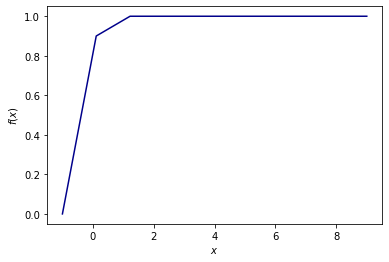

In [79]:
x = np.linspace(-1,9,10)
cdf = bernoulli_rv.cdf(x) # вернёт массив из значений функции распределения
plt.plot(x, cdf, color="darkblue")
plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.plot()

In [41]:
# определяем номер выигрышного билета
win_ticket = random.randint(1, 10) 
#считаем выигрыш
if win_ticket == 1: 
    money_win = 10 - 1 
    print("Выигрыш", money_win, "денежных единиц")
else: 
    money_win = -1 
    print("Проигрыш", money_win, "денежных единиц")

Проигрыш -1 денежных единиц


In [77]:
# создаем список вероятностей
p = [0.9, 0.1]

# создаем закон распределения случайной величины X
x = np.random.choice([-1, 9], size=1, p=p)

# выводим результат
print(x.item())

-1


Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

In [ ]:
#не получилось решить, сложно 

## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [42]:
# вероятность того, что первой картой была шестерка, а второй - семерка
p1 = 4 / 36 #4 шестерки в колоде
p2 = 4 / 35 #4 семерки из оставшихся карт
p = p1 * p2
print('Вероятность того, что первой картой была шестерка, а второй — семерка', p)


Вероятность того, что первой картой была шестерка, а второй — семерка 0.012698412698412697


In [43]:
# Найти условную вероятность того же события при условии, что обе карты бубновой масти
bubi = 9 / 36 #9 карт буби
bubi_2 = 8 / 35 #осталось 8 буби и 35 карт
bubi_3 = bubi * bubi_2 #2 карты буби вероятность
p_cond = (2 / 36) * (1 / 35) / bubi_3
print('Вероятность того же события при условии, что обе карты бубновой масти =', p_cond)


Вероятность того же события при условии, что обе карты бубновой масти = 0.027777777777777776


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [50]:
# заполняем урну
Urn_full =['white', 'white', 'black', 'black', 'black'] 
A=0 
B=0
i=0
# задаем число экспериментов
n=1000
# генерируем выборку
while i<n:
    i+=1
    Urn_full =['white', 'white', 'black', 'black', 'black'] 
    x=random.choice(Urn_full)
    # Убираем первый шар
    Urn_full.remove(x)
    Urn_full2=Urn_full
    
 # Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар     
    if x == 'black': 
        Urn_full.append('white')
        Urn_full2=Urn_full
    
    y=random.choice(Urn_full2)
     
    
    if x =='white' and y == 'white':
        A+=1 
    elif x =='black' and y == 'black':
        B+=1 
   
print('Вероятность события "извлечены два белых шара" =', A/n)
print('Вероятность события "извлечены два черных шара" =', B/n)

Вероятность события "извлечены два белых шара" = 0.087
Вероятность события "извлечены два черных шара" = 0.258
